# Plots

In [1]:
import pyevals
import seaborn as sns


tips = sns.load_dataset("tips")
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


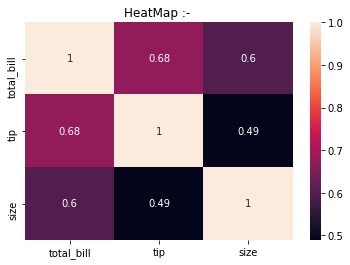

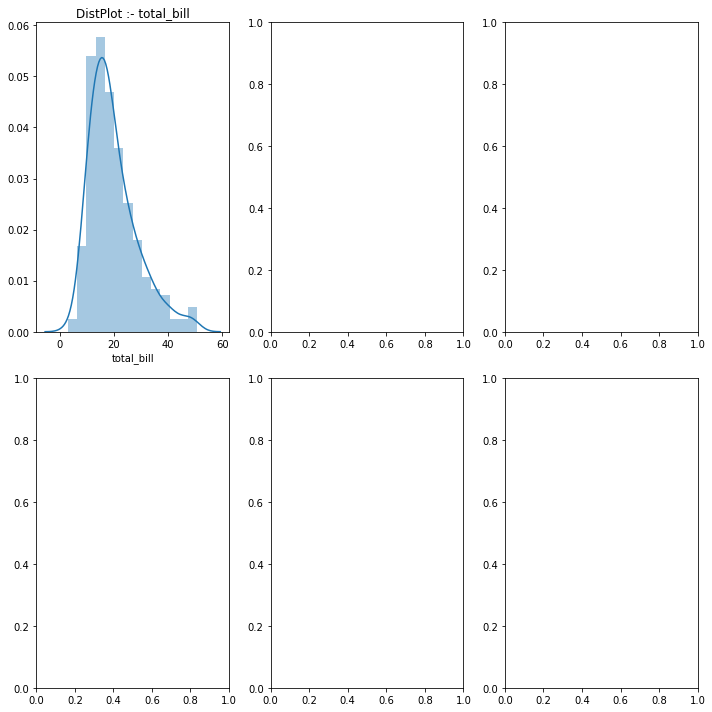

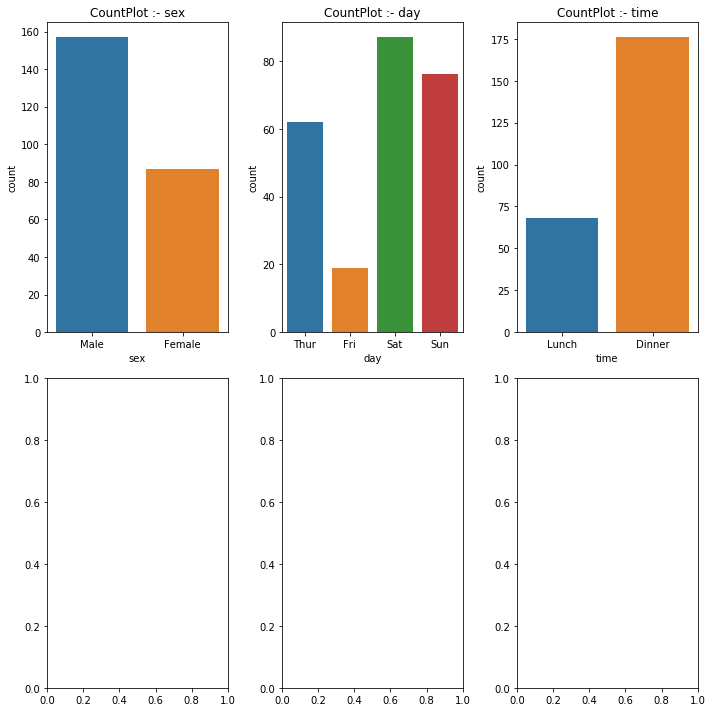

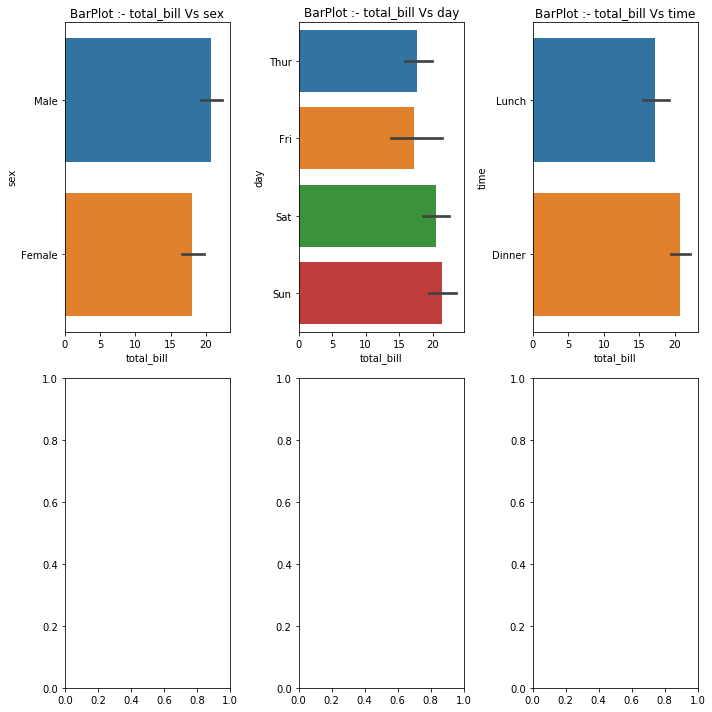

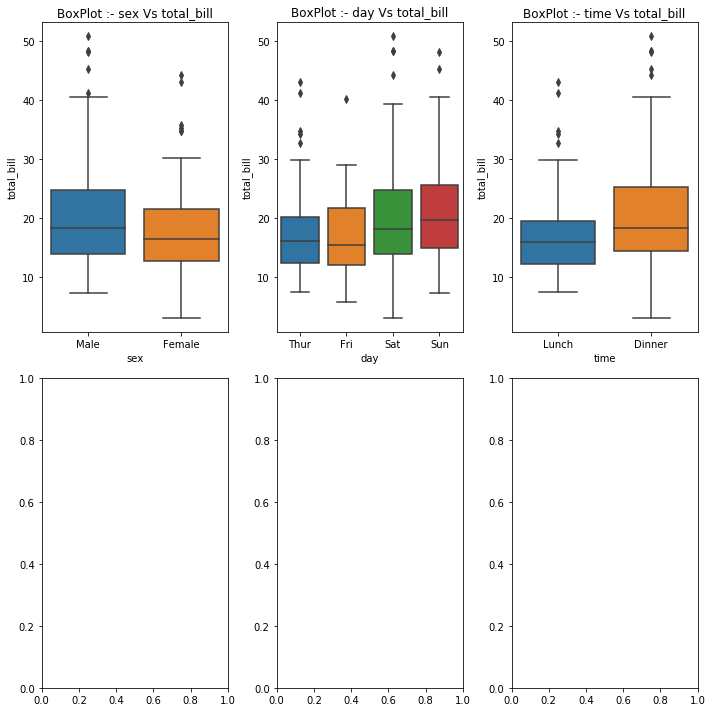

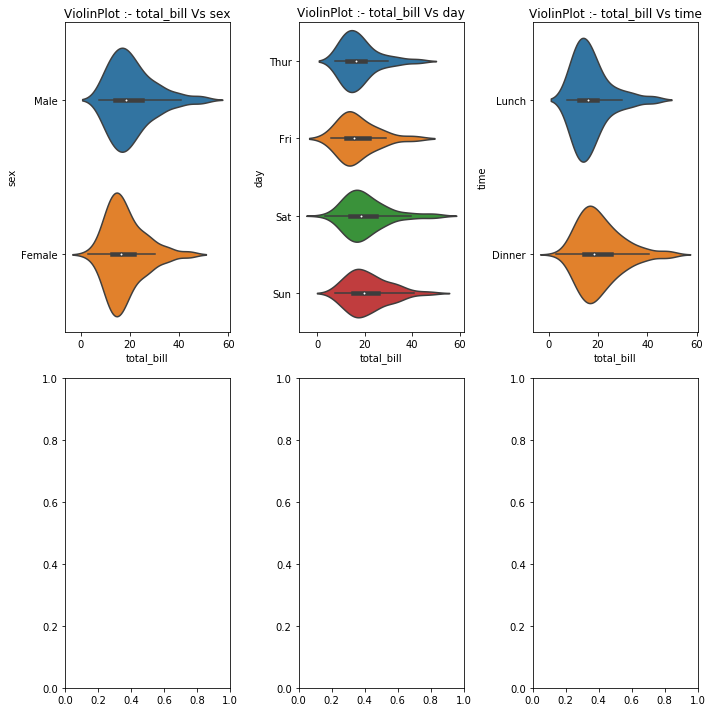

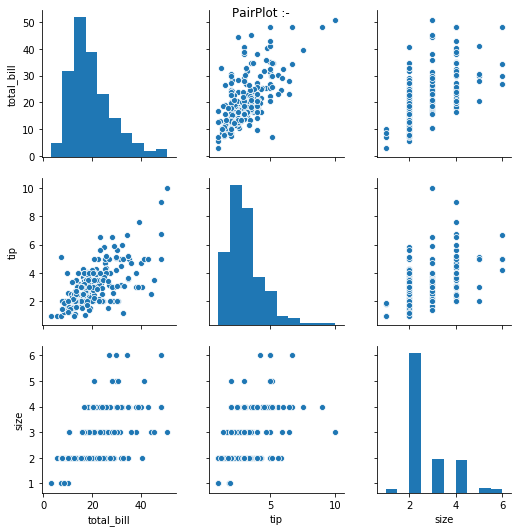

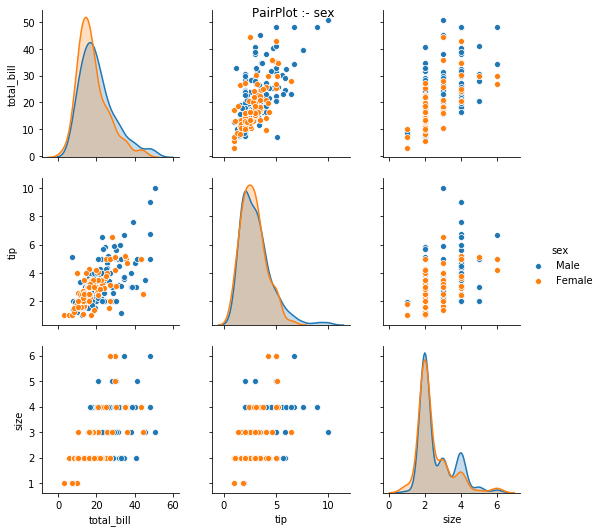

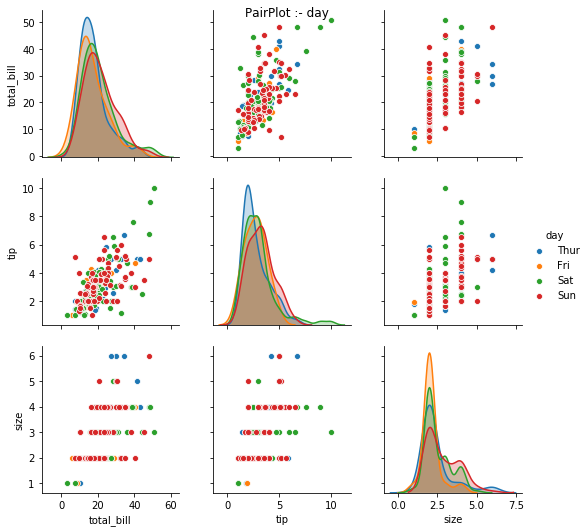

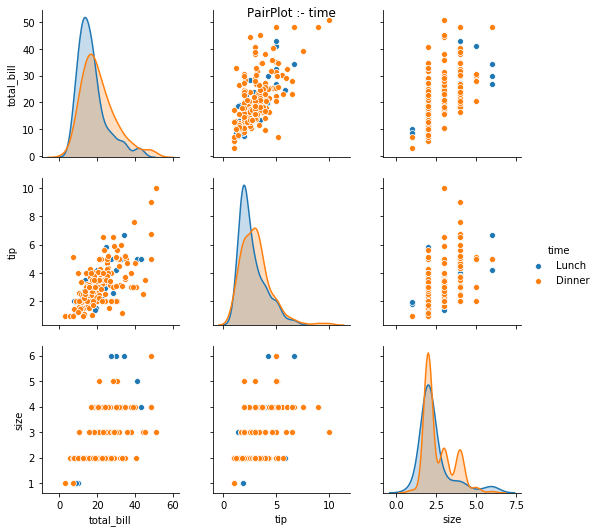

In [3]:
pyevals.BuildPlots(tips,['sex','day','time'],['total_bill'])

# Regression

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

tips['sex'] = label_encoder.fit_transform(tips['sex'])
tips['smoker'] = label_encoder.fit_transform(tips['smoker'])
tips['day'] = label_encoder.fit_transform(tips['day'])
tips['time'] = label_encoder.fit_transform(tips['time'])

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int32  
 3   smoker      244 non-null    int32  
 4   day         244 non-null    int32  
 5   time        244 non-null    int32  
 6   size        244 non-null    int64  
dtypes: float64(2), int32(4), int64(1)
memory usage: 9.7 KB


In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int32  
 3   smoker      244 non-null    int32  
 4   day         244 non-null    int32  
 5   time        244 non-null    int32  
 6   size        244 non-null    int64  
dtypes: float64(2), int32(4), int64(1)
memory usage: 9.7 KB


In [8]:
y= tips[['total_bill']]
x=tips.drop('total_bill',axis=1)

In [13]:
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.25)

In [14]:
Object = pyevals.build(x_train,x_test,y_train,y_test,'regression')
Object.evaluate()

,1-R2Score,1-AdjustedR2,MeanAbsoluteError,MeanSquaredError,RootMeanSquaredError
LinearRegression,0.494203,0.511051,4.135657,33.854126,5.818430
PolynomialRegression,0.556657,0.575634,4.303830,38.132390,6.175143
RidgeRegression,0.492979,0.509786,4.146471,33.770307,5.811223
LassoRegression,0.525087,0.542988,4.760019,35.969759,5.997479
SupportVectorRegressor,0.587248,0.607267,4.729322,40.227917,6.342548
GradientBoostingRegression,0.471192,0.487255,4.278883,32.277808,5.681356


# Classification

In [14]:
import pyevals
import pandas as pd
import numpy as np
import warnings 

df=pd.read_csv('Classified Data',index_col=0)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(df.drop("TARGET CLASS",axis=1))

scaled_features=scaler.transform(df.drop("TARGET CLASS",axis=1))
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scaled_features,df["TARGET CLASS"],test_size=0.25)

In [15]:
s = pyevals.build(x_train,x_test,y_train,y_test,'classification')
s.evaluate()

MultinomialNaiveBayes algorithm cannot be performed with standard scalar!.


,Accuracy,RecallScore,PresicionScore,f1Score
KNN,0.944000,0.945410,0.944498,0.943986
LogisticRegression,0.944000,0.945025,0.944000,0.943968
DecisionTreeClassifier,0.860000,0.860254,0.859631,0.859818
RandomForestClassifier,0.932000,0.933190,0.932220,0.931973
SupportVectorClassifier,0.944000,0.945025,0.944000,0.943968
QuadraticDiscriminantSnalysis,0.936000,0.937392,0.936496,0.935984
SGDClassifier,0.944000,0.945025,0.944000,0.943968
AdaBoost,0.912000,0.913721,0.913191,0.911994
CalibratedClassifier,0.940000,0.941209,0.940220,0.939976
MultinomialNB,0.000000,0.000000,0.000000,0.000000
